<a href="https://colab.research.google.com/github/swerchansky/optimization-methods/blob/main/2_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from time import time
from random import shuffle
from math import exp

# 1 пункт

## loss function

In [2]:
def loss_function(X, Y, theta):
    return (Y - X@theta).T@(Y - X@theta)

## SGD

In [3]:
def stochastic_descent(X, Y, coefficients, lr=0.1, eps=1e-4):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        theta[0] += lr * derivatives[0]
        theta[1] += lr * derivatives[1]
        current_cost = loss_function(X, Y, theta)
    return theta

## Minibatch GD


In [4]:
def minibatch_descent(X, Y, coefficients, batch_size=10, lr=0.1, eps=1e-4):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    indices = [i for i in range(len(Y))]
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        shuffle(indices)
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            summ = 0
            for i in range(batch_size):
                index = indices[i]
                summ += (Y[index] - X[index]@theta) * X[index][j]
            derivatives[j] = summ
        theta[0] += lr * derivatives[0]
        theta[1] += lr * derivatives[1]
        current_cost = loss_function(X, Y, theta)
    return theta

## GD

In [5]:
def batch_descent(X, Y, coefficients, lr=0.001, eps=1e-4):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    theta.reshape((len(theta), 1))
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            summ = 0
            for i in range(len(Y)):
                summ += (Y[i] - X[i]@theta) * X[i][j]
            derivatives[j] = summ
        theta[0] += lr * derivatives[0]
        theta[1] += lr * derivatives[1]
        current_cost = loss_function(X, Y, theta)
    return theta

## Testing

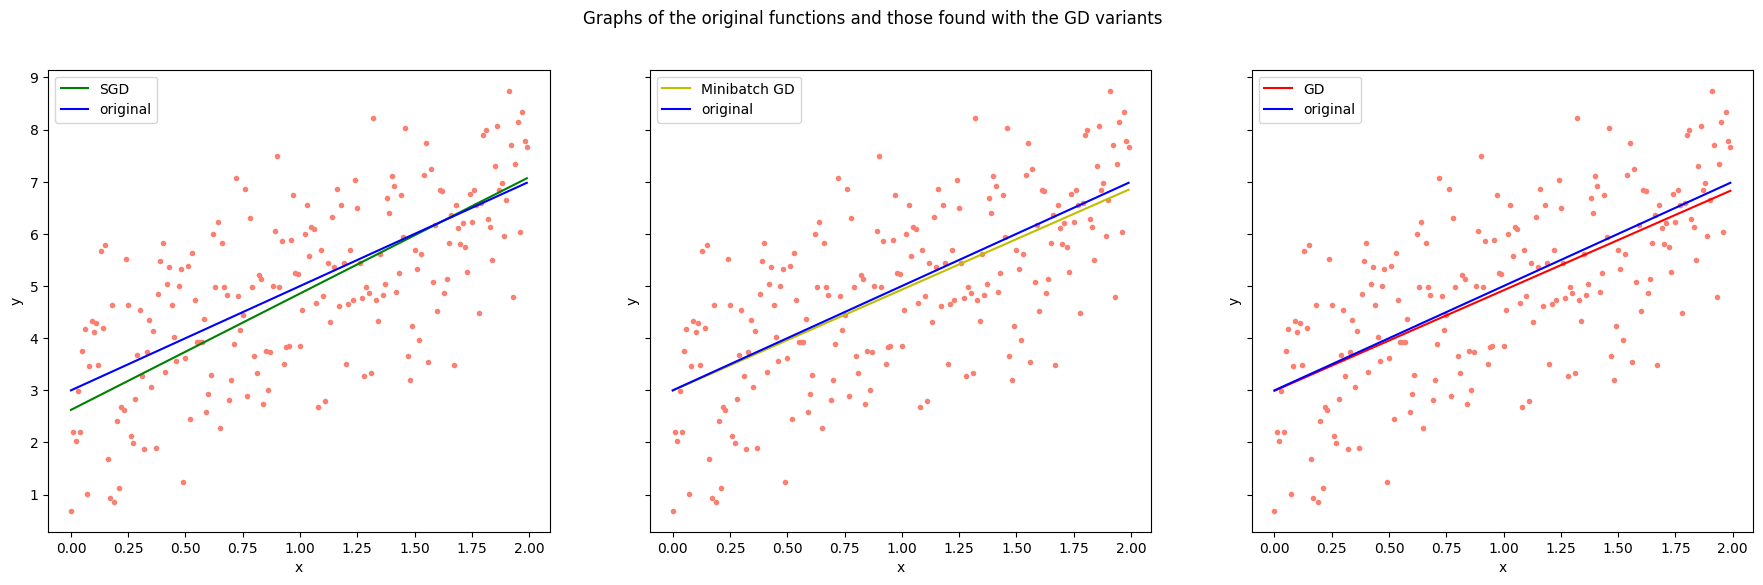

In [ ]:
def func(x):
    return 2 * x + 3

def generate_sample(step=0.01, total=200):
    x = 0
    for i in range(total):
        yield func(x) + np.random.uniform(-1, 1) * np.random.uniform(1, 3)
        x += step

TOTAL = 200
STEP = 0.01
INITIAL_THETA = [9, 14]

X = np.arange(0, TOTAL * STEP, STEP, dtype=np.float64)
Y = np.array([y for y in generate_sample(STEP, TOTAL)], dtype=np.float64)

A = np.empty((TOTAL, 2), dtype=np.float64)
A[:, 0] = 1
A[:, 1] = X

theta_stochastic = stochastic_descent(A, Y, INITIAL_THETA, lr=0.001, eps=1e-6)
theta_minibatch = minibatch_descent(A, Y, INITIAL_THETA, batch_size=30, lr=0.001, eps=1e-6)
theta_batch = batch_descent(A, Y, INITIAL_THETA, lr=0.001, eps=1e-6)


def function(x, theta):
    return theta[0] + theta[1] * x

colors = ['g', 'y', 'r']
data = [theta_stochastic, theta_minibatch, theta_batch]
labels = ['SGD', 'Minibatch GD', 'GD']

f,axs = plt.subplots(1, 3, figsize=(22, 6), sharex=True, sharey=True)
f.suptitle("Graphs of the original functions and those found with the GD variants")
for i,ax in enumerate(axs):
  axs[i].plot(X, Y, 'o', color='salmon', markersize=3)
  axs[i].plot(X, [function(p, data[i]) for p in X], '-', color=colors[i], markersize=4, label=labels[i])
  axs[i].plot(X, [func(p) for p in X], '-', color='b', zorder=4, markersize=4, label='original')
  axs[i].set_xlabel("x")
  axs[i].set_ylabel("y")
  axs[i].legend(loc="upper left")

plt.show()

# 2 пункт

## SGD with learning rate scheduling

In [6]:
def exp_lr(epoch, initial_lr):
  k = 0.0001
  learning_rate = initial_lr * exp(-k*epoch)
  return learning_rate


def stochastic_descent_with_lr_scheduling(X, Y, coefficients, lr=0.1, eps=1e-4):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    epoch = 1
    while np.abs(previous_cost - current_cost) > eps:
        learning_rate = exp_lr(epoch, lr)
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        theta[0] += learning_rate * derivatives[0]
        theta[1] += learning_rate * derivatives[1]
        current_cost = loss_function(X, Y, theta)
        epoch += 1
    return theta

## Testing

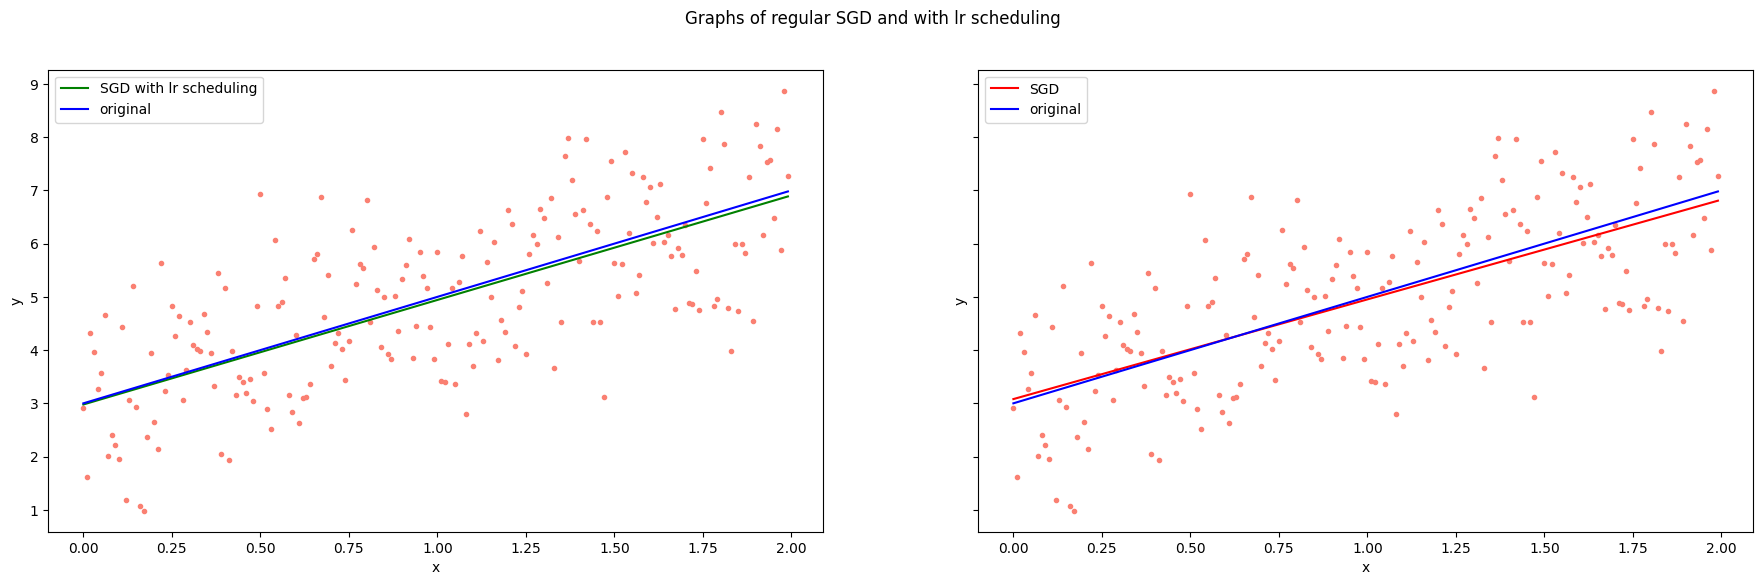

In [ ]:
def func(x):
    return 2 * x + 3

def generate_sample(step=0.01, total=200):
    x = 0
    for i in range(total):
        yield func(x) + np.random.uniform(-1, 1) * np.random.uniform(1, 3)
        x += step

TOTAL = 200
STEP = 0.01
INITIAL_THETA = [9, 14]

X = np.arange(0, TOTAL * STEP, STEP, dtype=np.float64)
Y = np.array([y for y in generate_sample(STEP, TOTAL)], dtype=np.float64)

A = np.empty((TOTAL, 2), dtype=np.float64)
A[:, 0] = 1
A[:, 1] = X

theta_stochastic_with_lr_scheduling = stochastic_descent_with_lr_scheduling(A, Y, INITIAL_THETA, lr=0.003, eps=1e-6)
theta_stochastic = stochastic_descent(A, Y, INITIAL_THETA, lr=0.003, eps=1e-6)

def function(x, theta):
    return theta[0] + theta[1] * x

colors = ['g', 'r']
data = [theta_stochastic_with_lr_scheduling, theta_stochastic]
labels = ['SGD with lr scheduling', 'SGD']

f,axs = plt.subplots(1, 2, figsize=(22, 6), sharex=True, sharey=True)
f.suptitle("Graphs of regular SGD and with lr scheduling")
for i,ax in enumerate(axs):
  axs[i].plot(X, Y, 'o', color='salmon', markersize=3)
  axs[i].plot(X, [function(p, data[i]) for p in X], '-', color=colors[i], markersize=4, label=labels[i])
  axs[i].plot(X, [func(p) for p in X], '-', color='b', zorder=4, markersize=4, label='original')
  axs[i].set_xlabel("x")
  axs[i].set_ylabel("y")
  axs[i].legend(loc="upper left")

plt.show()

# 3 пункт

## Utils

In [8]:
def check_points(point1, point2, eps=1e-6):
    for i in range(len(point1)):
      if abs(point1[i] - point2[i]) > eps:
        return True
    return False

def draw_3d_function(left_limit, right_Limit, points, azim, dist, elev, function):
    t = np.linspace(left_limit, right_Limit, 1000)
    X, Y = np.meshgrid(t, t)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    my_col = cm.cool(function(X, Y)/np.amax(function(X, Y))) # color of surface
    ax.plot_surface(X, Y, function(X, Y), facecolors = my_col,
                    alpha=0.8, rstride=12, cstride=12, zorder=1) # draw function surface
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    Z = [function(p[0], p[1]) for p in points]
    ax.plot(X, Y, Z,'.', color='salmon', zorder=4, markersize=4) # draw dots of gradient_descent
    ax.plot(X, Y, Z, linewidth=0.5, color='salmon', zorder=4) # draw lines beetwen dots
    ax.plot(X[0], Y[0], Z[0], 's', color='orangered', zorder=4, markersize=10) # draw entry point
    ax.plot(X[-1], Y[-1], Z[-1], 'X', color='orangered', zorder=4, markersize=10) # draw end point
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    plt.show()
  
def draw_lines_of_level(points, function):
    t = np.linspace(-7, 7, 100)
    X, Y = np.meshgrid(t, t)
    plt.plot([p[0] for p in points], [p[1] for p in points], 'o-', color='salmon', zorder=4, markersize=4) # draw dots of gradient_descent
    plt.plot([p[0] for p in points], [p[1] for p in points], linewidth=0.5, color='salmon', zorder=4) # draw lines beetwen dots
    plt.plot(points[0][0], points[0][1], 's', color='orangered', zorder=4, markersize=10) # draw entry point
    plt.plot(points[-1][0], points[-1][1], 'X', color='orangered', zorder=4, markersize=10) # draw end point
    plt.contour(X, Y, function(X, Y), levels=np.unique(sorted([function(p[0], p[1]) for p in points])))
    plt.show()

## GD with Momentum

In [9]:
def gradient_descent_with_momentum(x, grad_f, lr=0.1, alpha=0.9):
    theta = x.copy()
    points = [x]
    delta_theta = np.array([0, 0], dtype=np.float64)
    theta = theta - lr * np.array(grad_f(theta[0], theta[1]))
    points.append(theta)
    while check_points(points[-2], points[-1]):
        previous_theta = points[-2]
        delta_theta[0] = abs(previous_theta[0] - theta[0])
        delta_theta[1] = abs(previous_theta[1] - theta[1])
        theta = theta - lr * np.array(grad_f(theta[0], theta[1])) + alpha * delta_theta
        points.append(theta)
    return points

## GD with Nesterov

In [10]:
def gradient_descent_with_nesterov(x, grad_f, lr=0.1, alpha=0.9):
    theta = x.copy()
    points = [x]
    delta_theta = np.array([0, 0], dtype=np.float64)
    theta = theta - lr * np.array(grad_f(theta[0], theta[1]))
    points.append(theta)
    while check_points(points[-2], points[-1]):
        previous_theta = points[-2]
        delta_theta[0] = abs(previous_theta[0] - theta[0])
        delta_theta[1] = abs(previous_theta[1] - theta[1])
        theta += alpha * delta_theta
        theta = theta - lr * np.array(grad_f(theta[0], theta[1]))
        points.append(theta)
    return points

## GD with AdaGrad

In [11]:
def gradient_descent_with_adagrad(x, grad_f, lr=2):
    theta = x.copy()
    points = [x]
    g = np.array([0, 0], dtype=np.float64)
    g += np.array(grad_f(theta[0], theta[1])) ** 2
    theta = theta - lr / (g ** 0.5) * np.array(grad_f(theta[0], theta[1]))
    points.append(theta)
    while check_points(points[-2], points[-1]):
        previous_theta = points[-2]
        g += np.array(grad_f(theta[0], theta[1])) ** 2
        theta = theta - lr / (g ** 0.5) * np.array(grad_f(theta[0], theta[1]))
        points.append(theta)
    return points

## GD with RMSProp

In [12]:
def gradient_descent_with_rmsprop(x, grad_f, lr=2, gamma=0.9):
    theta = x.copy()
    points = [x]
    g = np.array([0, 0], dtype=np.float64)
    g = gamma * g + (1 - gamma) * np.array(grad_f(theta[0], theta[1])) ** 2
    theta = theta - lr / (g ** 0.5 + 1e-6) * np.array(grad_f(theta[0], theta[1]))
    points.append(theta)
    while check_points(points[-2], points[-1]):
        previous_theta = points[-2]
        g = gamma * g + (1 - gamma) * np.array(grad_f(theta[0], theta[1])) ** 2
        theta = theta - lr / (g ** 0.5 + 1e-6) * np.array(grad_f(theta[0], theta[1]))
        points.append(theta)
    return points

## GD with Adam

In [16]:
def gradient_descent_with_adam(x, grad_f, lr=0.1, b1=0.9, b2=0.999):
    theta = x.copy()
    points = [x]
    m = np.array([0, 0], dtype=np.float64)
    v = np.array([0, 0], dtype=np.float64)
    m = b1 * m + (1 - b1) * np.array(grad_f(theta[0], theta[1]))
    v = b2 * v + (1 - b2) * np.array(grad_f(theta[0], theta[1])) ** 2
    mm = m / (1 - b1)
    vv = v / (1 - b2)
    theta = theta - lr / (vv ** 0.5) * mm
    points.append(theta)
    epoch = 1
    while check_points(points[-2], points[-1]):
        m = b1 * m + (1 - b1) * np.array(grad_f(theta[0], theta[1]))
        v = b2 * v + (1 - b2) * np.array(grad_f(theta[0], theta[1])) ** 2
        mm = m / (1 - b1 ** epoch)
        vv = v / (1 - b2 ** epoch)
        theta = theta - lr / (vv ** 0.5) * mm
        points.append(theta)
        epoch += 1
    return points


## Testing

[1.00005359 2.99995647]
[1.00002773 2.99997663]
[1.00011432 2.99988457]
[1.00000027 2.99999981]
[0.99997887 2.99998718]


<ipython-input-8-2142b8803852>:26: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


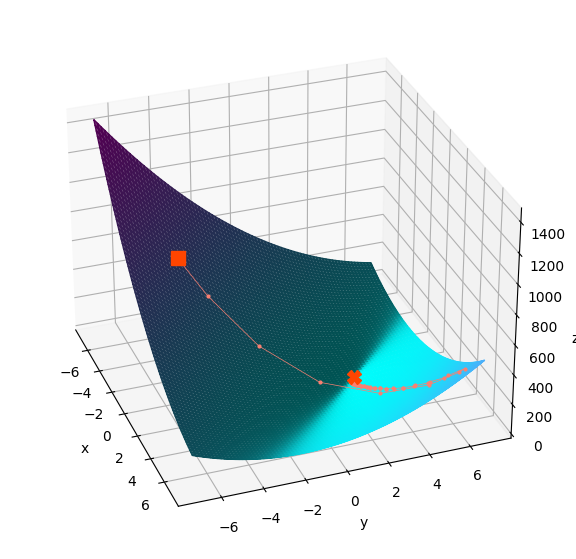

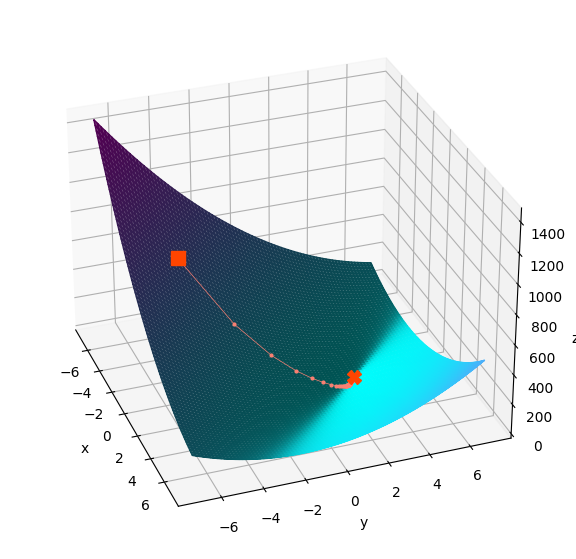

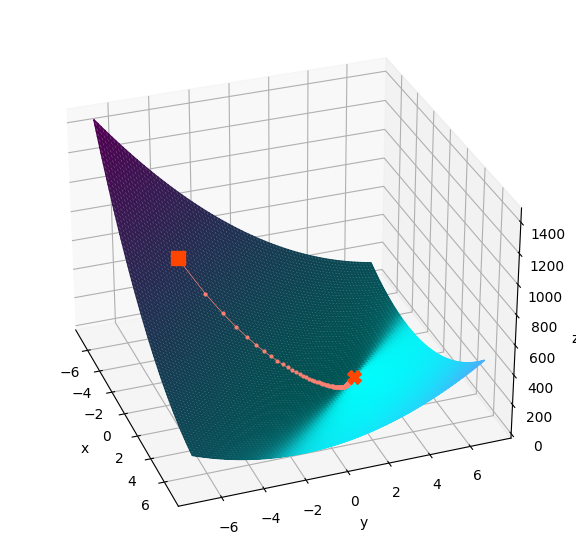

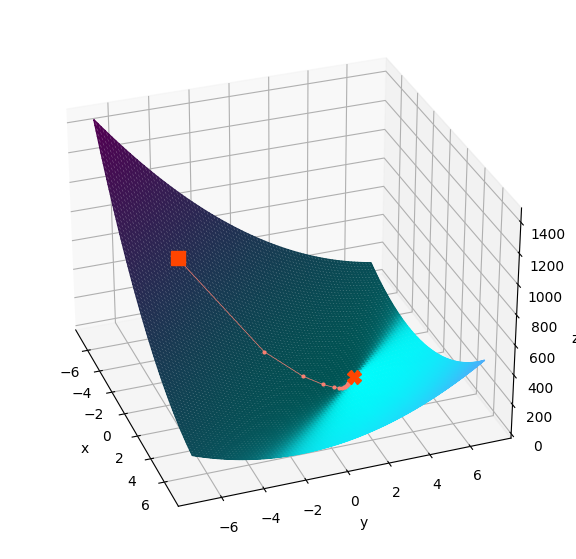

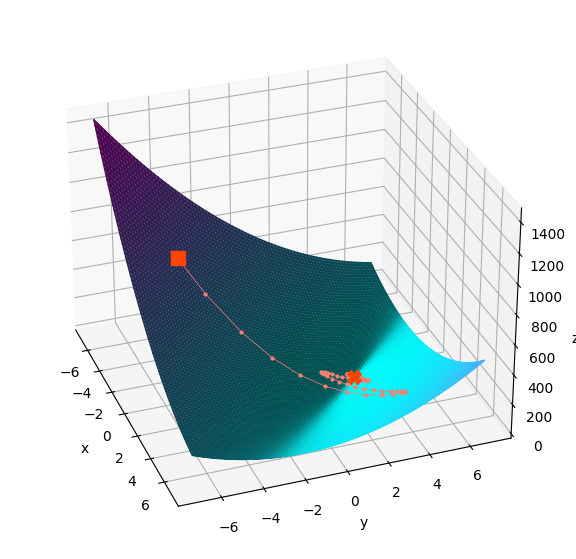

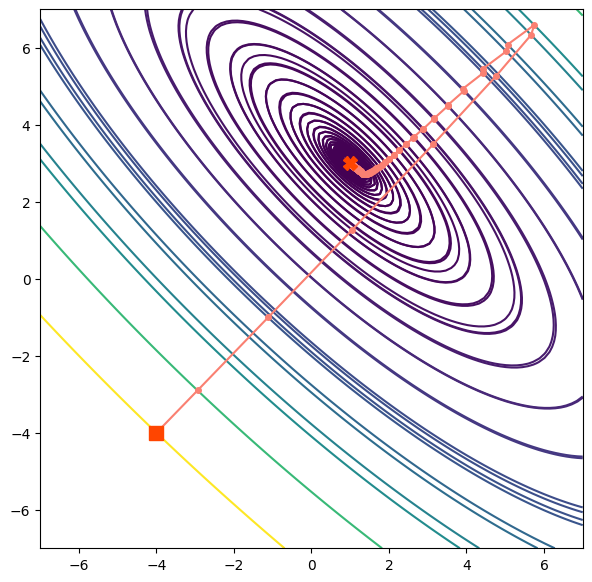

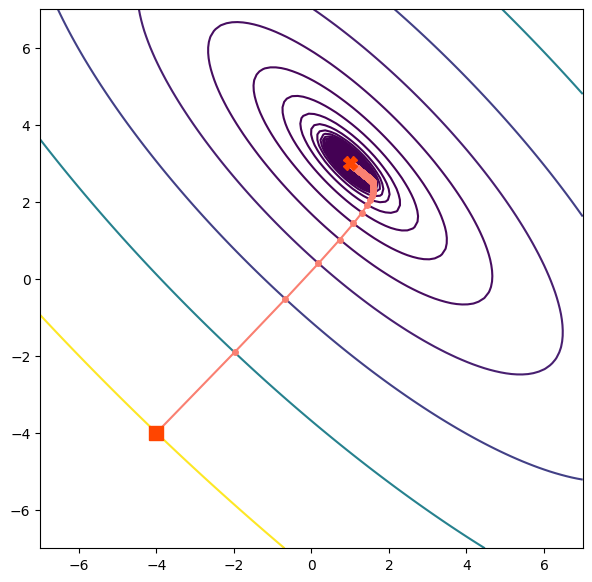

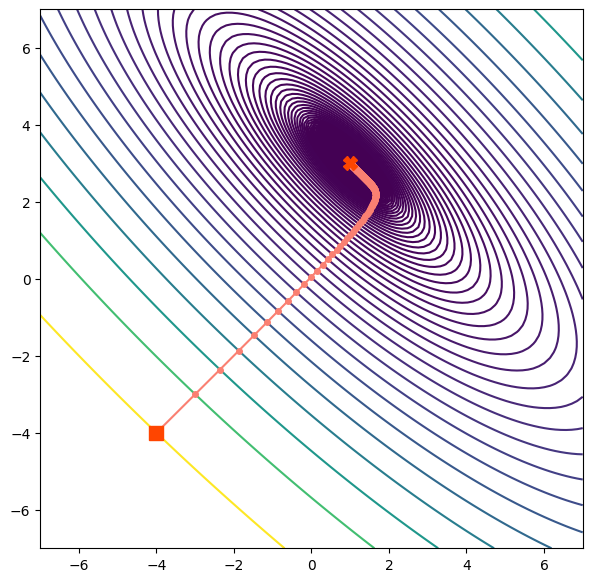

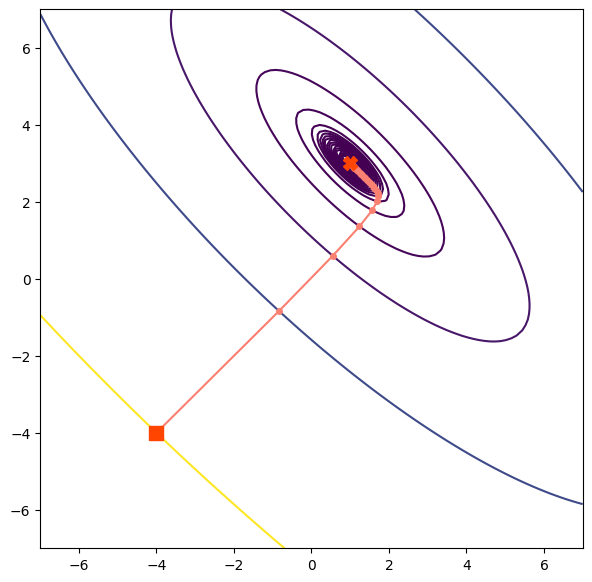

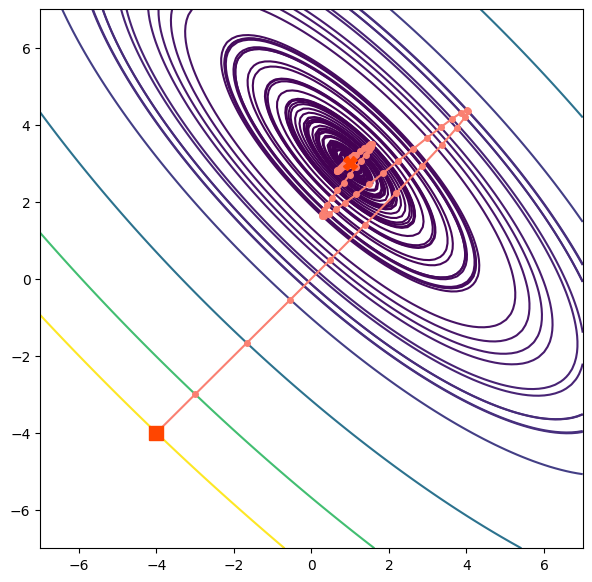

In [17]:
# def f(x, y):
#     return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
# def grad(x, y):
#     return [2 * (200 * x ** 3 - 200 * x * y + x - 1), -200 * (x ** 2 - y)]

# def f(x, y):
#     return 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y
# def grad(x, y):
#     return [0.52 * x - 0.48 * y, 0.52 * y - 0.48 * x]

def f(x, y):
    return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2
def grad(x, y):
    return [10 * x + 8 * y - 34, 8 * x + 10 * y - 38]

def gradient_descent(x, grad_f, lr=0.1):
    points = [x]
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)

    return points

x = [-4, -4]
points_gd = gradient_descent(x, grad, lr=0.01)
points_with_momentum = gradient_descent_with_momentum(x, grad, lr=0.01)
points_with_nesterov = gradient_descent_with_nesterov(x, grad, lr=0.01)
points_with_adagrad = gradient_descent_with_adagrad(x, grad, lr=1)
points_with_rmsprop = gradient_descent_with_rmsprop(x, grad, lr=1)
points_with_adam = gradient_descent_with_adam(x, grad, lr=1)

plt.rcParams["figure.figsize"] = (7, 7)
print(points_with_momentum[-1])
print(points_with_nesterov[-1])
print(points_with_adagrad[-1])
print(points_with_rmsprop[-1])
print(points_with_adam[-1])
draw_3d_function(-7, 7, points_with_momentum, -20, 10, 30, f)
draw_3d_function(-7, 7, points_with_nesterov, -20, 10, 30, f)
draw_3d_function(-7, 7, points_with_adagrad, -20, 10, 30, f)
draw_3d_function(-7, 7, points_with_rmsprop, -20, 10, 30, f)
draw_3d_function(-7, 7, points_with_adam, -20, 10, 30, f)
draw_lines_of_level(points_with_momentum, f)
draw_lines_of_level(points_with_nesterov, f)
draw_lines_of_level(points_with_adagrad, f)
draw_lines_of_level(points_with_rmsprop, f)
draw_lines_of_level(points_with_adam, f)

## Maybe will be helpful

In [ ]:
def stochastic_descent_with_momentum(X, Y, coefficients, lr=0.1, eps=1e-4, alpha=0.01):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_theta = np.array(coefficients.copy(), dtype=np.float64)
    delta_theta = np.zeros(2, dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        delta_theta[0] = abs(previous_theta[0] - theta[0])
        delta_theta[1] = abs(previous_theta[1] - theta[1])
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        previous_theta[0] = theta[0]
        previous_theta[1] = theta[1]
        theta[0] += (lr * derivatives[0] + alpha * delta_theta[0])
        theta[1] += (lr * derivatives[1] + alpha * delta_theta[1])
        current_cost = loss_function(X, Y, theta)
    return theta

def stochastic_descent_with_nesterov(X, Y, coefficients, lr=0.1, eps=1e-4, alpha=0.01):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_theta = np.array(coefficients.copy(), dtype=np.float64)
    delta_theta = np.zeros(2, dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        delta_theta[0] = abs(previous_theta[0] - theta[0])
        delta_theta[1] = abs(previous_theta[1] - theta[1])
        theta[0] += alpha * delta_theta[0]
        theta[1] += alpha * delta_theta[0]
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        previous_theta[0] = theta[0]
        previous_theta[1] = theta[1]
        theta[0] += lr * derivatives[0]
        theta[1] += lr * derivatives[1]
        current_cost = loss_function(X, Y, theta)
    return theta

def stochastic_descent_with_adagrad(X, Y, coefficients, lr=0.1, eps=1e-4):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    # previous_gradients = []
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    g = [0, 0]
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        g[0] += derivatives[0] ** 2
        g[1] += derivatives[1] ** 2
        # previous_gradients.append(derivatives)
        # g = [0, 0]
        # for i in range(len(g)):
        #   for j in range(len(previous_gradients)):
        #     g[i] += previous_gradients[j][i] ** 2
        theta[0] += lr / g[0] ** 0.5 * derivatives[0]
        theta[1] += lr / g[1] ** 0.5 * derivatives[1]
        current_cost = loss_function(X, Y, theta)
    return theta

def stochastic_descent_with_rmsprop(X, Y, coefficients, lr=0.1, eps=1e-4, gamma=0.9):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    g = [0, 0]
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        g[0] = gamma * g[0] + (1 - gamma) * derivatives[0] ** 2
        g[1] = gamma * g[1] + (1 - gamma) * derivatives[1] ** 2
        theta[0] += lr / g[0] ** 0.5 * derivatives[0]
        theta[1] += lr / g[1] ** 0.5 * derivatives[1]
        current_cost = loss_function(X, Y, theta)
    return theta

def stochastic_descent_with_adam(X, Y, coefficients, lr=0.1, eps=1e-4, b1=0.9, b2=0.999):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    m = [0, 0]
    v = [0, 0]
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        if m[0] == 0 and m[1] == 0:
          m[0] = derivatives[0]
          m[1] = derivatives[1]
          # m[0] = m[0] / (1 - b1)
          # m[1] = m[1] / (1 - b1)
          v[0] = derivatives[0] ** 2
          v[1] = derivatives[1] ** 2
          # v[0] = v[0] / (1 - b2)
          # v[1] = v[1] / (1 - b2)
        m[0] = b1 * m[0] + (1 - b1) * derivatives[0]
        m[1] = b1 * m[1] + (1 - b1) * derivatives[1]
        # m[0] = m[0] / (1 - b1)
        # m[1] = m[1] / (1 - b1)
        v[0] = b2 * v[0] + (1 - b2) * derivatives[0] ** 2
        v[1] = b2 * v[1] + (1 - b2) * derivatives[1] ** 2
        # v[0] = v[0] / (1 - b2)
        # v[1] = v[1] / (1 - b2)
        # print(derivatives[0], m[0], v[0])
        theta[0] += lr / (v[0] ** 0.5) * m[0]
        theta[1] += lr / (v[1] ** 0.5) * m[1]
        current_cost = loss_function(X, Y, theta)
        print(current_cost, theta)
    return theta


def func(x):
    return 2 * x + 3

def generate_sample(step=0.1, total=400):
    x = 0
    for i in range(total):
        yield func(x) + np.random.uniform(-1, 1) * np.random.uniform(1, 8)
        x += step

TOTAL = 200
STEP = 0.01
INITIAL_THETA = [20, 20]

X = np.arange(0, TOTAL * STEP, STEP, dtype=np.float64)
Y = np.array([y for y in generate_sample(STEP, TOTAL)], dtype=np.float64)

A = np.empty((TOTAL, 2), dtype=np.float64)
A[:, 0] = 1
A[:, 1] = X

theta_stochastic_with_nesterov = stochastic_descent_with_nesterov(A, Y, INITIAL_THETA, lr=0.001, eps=1e-6)
theta_stochastic_with_momentum = stochastic_descent_with_momentum(A, Y, INITIAL_THETA, lr=0.001, eps=1e-6)
theta_stochastic_with_adagrad = stochastic_descent_with_adagrad(A, Y, INITIAL_THETA, lr=0.3, eps=1e-6)
theta_stochastic_with_rmsprop = stochastic_descent_with_rmsprop(A, Y, INITIAL_THETA, lr=0.03, eps=1e-6)
theta_stochastic_with_adam = stochastic_descent_with_adam(A, Y, INITIAL_THETA, lr=0.01, eps=1e-6)
theta_stochastic = stochastic_descent(A, Y, INITIAL_THETA, lr=0.001, eps=1e-6)

def function(x, theta):
    return theta[0] + theta[1] * x

colors = ['red', 'black', 'lime', 'lawngreen', 'fuchsia', 'aqua']
data = [theta_stochastic, theta_stochastic_with_nesterov, theta_stochastic_with_momentum, theta_stochastic_with_adagrad, theta_stochastic_with_rmsprop, theta_stochastic_with_adam]
labels = ['SGD', 'SGD with nesterov', 'SGD with momentum', 'SGD with adagrad', 'SGD with RMSProp', 'SGD with adam']

f,axs = plt.subplots(2, 3, figsize=(20, 10), sharex=True, sharey=True)
f.suptitle("Graphs of regular SGD and with momentum")
for i,ax in enumerate(axs):
  for j in range(3):
    axs[i][j].plot(X, Y, 'o', color='salmon', markersize=3)
    axs[i][j].plot(X, [function(p, data[i * 3 + j]) for p in X], '-', color=colors[i * 3 + j], markersize=4, label=labels[i * 3 + j])
    axs[i][j].plot(X, [func(p) for p in X], '-', color='b', zorder=4, markersize=4, label='original')
    axs[i][j].set_xlabel("x")
    axs[i][j].set_ylabel("y")
    axs[i][j].legend(loc="upper left")

plt.show()

KeyboardInterrupt: ignored

# Доп

## Polynomial regression

In [ ]:
def stochastic_descent_with_adagrad(X, Y, coefficients, lr=0.1, eps=1e-4):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    g = np.zeros(len(theta), dtype=np.float64)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        for j in range(len(theta)):
          g[j] += derivatives[j] ** 2
          theta[j] += lr / g[j] ** 0.5 * derivatives[j]
        current_cost = loss_function(X, Y, theta)
        # print(current_cost)
    return theta

def stochastic_descent_with_adam(X, Y, coefficients, lr=0.1, eps=1e-4, b1=0.9, b2=0.999):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    m = np.zeros(len(theta), dtype=np.float64)
    v = np.zeros(len(theta), dtype=np.float64)
    epoch = 1
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        m = b1 * m + (1 - b1) * derivatives
        v = b2 * v + (1 - b2) * derivatives ** 2
        mm = m / (1 - b1 ** epoch)
        vv = v / (1 - b2 ** epoch)
        theta[0] += lr / (v[0] ** 0.5) * m[0]
        theta[1] += lr / (v[1] ** 0.5) * m[1]
        current_cost = loss_function(X, Y, theta)
        epoch += 1
        print(current_cost)
    return theta

## L1 regularization

In [ ]:
def stochastic_descent_with_adagrad_l1(X, Y, coefficients, lr=0.1, eps=1e-4, alpha=0.0000000001):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    g = np.zeros(len(theta), dtype=np.float64)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        # print(current_cost)
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        for j in range(len(theta)):
          g[j] += derivatives[j] ** 2
          theta[j] += lr / g[j] ** 0.5 * derivatives[j] 
        current_cost = loss_function(X, Y, theta)
        # if current_cost < 4:
        #   break
    return theta



## Testing

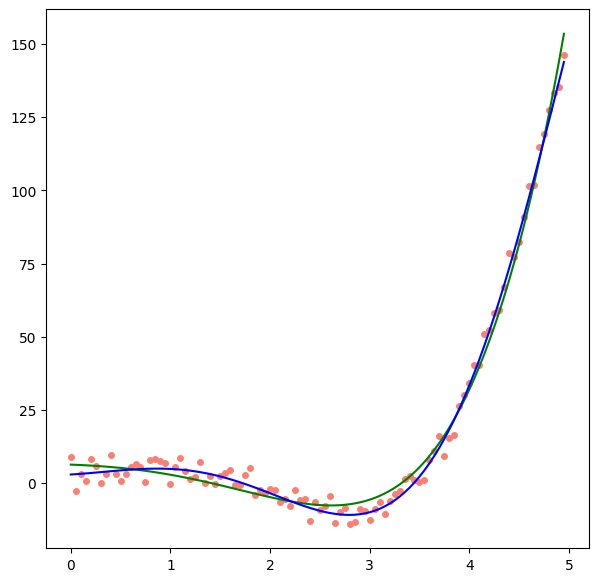

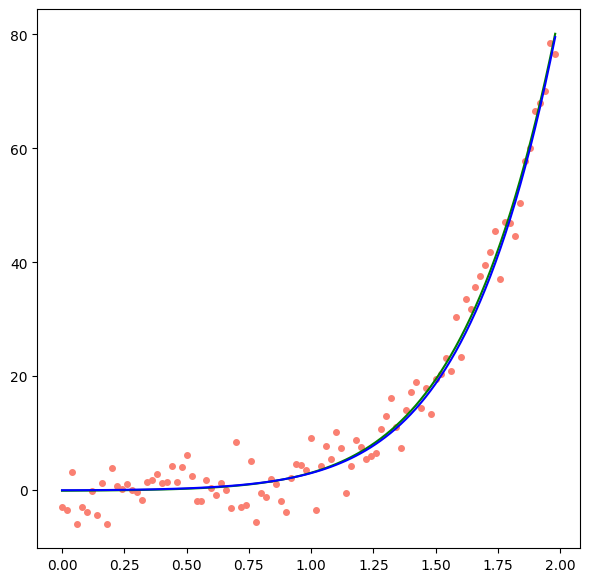

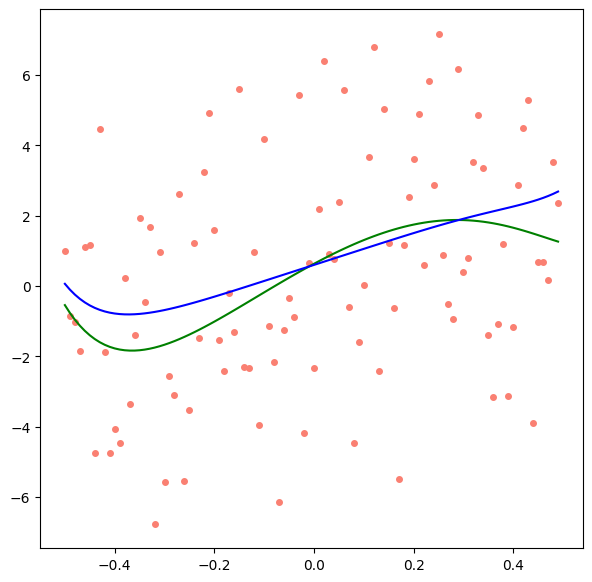

In [ ]:
def func1(x):
    return 3 + 2 * x + 3 * x ** 2 - 2 * x ** 3 - 2 * x ** 4 + 1 * x ** 5 - 0.1 * x ** 6

def func2(x):
    return x ** 2 + x ** 4 + x ** 6

def func3(x):
    return 0.6 + 4.567 * x - 29.875 * x ** 5 + 2 * x ** 6 - 0.0322 * x ** 7 + 200 * x ** 8


def generate_sample(step=0.01, total=200, func=func1, initial=0):
    x = initial
    for i in range(total):
        yield func(x) + np.random.uniform(-1, 1) * np.random.uniform(2, 8)
        x += step

TOTAL = [100, 100, 100]
STEP = [0.05, 0.02, 0.01]
FROM = [0, 0, -0.5]
INITIAL_THETA = [[1, 1, 1, 1, 1, 1, 1], [3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3]]
lr = [2, 0.1, 4]
eps = [1e-6, 1e-6, 1e-6]
func = [func1, func2, func3]

result = [0, 0, 0]

def function(x, theta):
    result = 0
    for i in range(len(theta)):
      result += theta[i] * x ** i
    return result

for i in range(len(TOTAL)):
  X = np.arange(FROM[i], TOTAL[i] * STEP[i] + FROM[i], STEP[i], dtype=np.float64)
  Y = np.array([y for y in generate_sample(STEP[i], TOTAL[i], func=func[i], initial=FROM[i])], dtype=np.float64)

  A = np.empty((TOTAL[i], len(INITIAL_THETA[i])), dtype=np.float64)
  for j in range(len(INITIAL_THETA[i])):
    A[:, j] = [x ** j for x in X]

  result[i] = stochastic_descent_with_adagrad(A, Y, INITIAL_THETA[i], lr=lr[i], eps=eps[i])

  plt.plot(X, Y, 'o', color='salmon', zorder=4, markersize=4)
  plt.plot(X, [function(p, result[i]) for p in X], '-', color='g', zorder=4, markersize=4)
  plt.plot(X, [func[i](p) for p in X], '-', color='b', zorder=4, markersize=4)
  plt.show()